### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('data/coupons.csv')

data['income'].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('data/coupons.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [163]:
data['occupation'].value_counts()


Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


3. Decide what to do about your missing data -- drop, replace, other...

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('data/coupons.csv')
data.isnull()
print(data.fillna({'CarryAway': 'NA'}))

           destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  Female  21  Unmarried partner  .

4. What proportion of the total observations chose to accept the coupon? 



In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('data/coupons.csv')
#data_coupon = data.filter(['toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min'])
value_counts = data['toCoupon_GEQ5min'].value_counts(dropna=True, sort=True)
print(value_counts)
value_counts1 = data['toCoupon_GEQ15min'].value_counts(dropna=True, sort=True)
data['toCoupon_GEQ25min'].value_counts()
#for restaurants less than 5 mins away 100% people accepted coupon for ones about 15 mins away  56% people accepted coupon
# and for restaurants about 25 mins away about 12% used/accepted the coupn


1    12684
Name: toCoupon_GEQ5min, dtype: int64


0    11173
1     1511
Name: toCoupon_GEQ25min, dtype: int64

5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:>

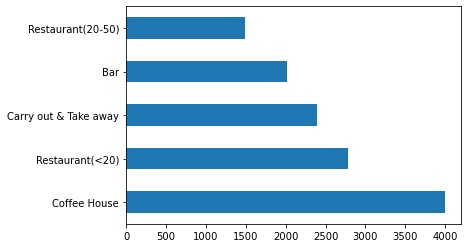

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('data/coupons.csv')
value_count = pd.value_counts(data['coupon'].values, sort=True)
value_count
value_count.plot.barh()
#This bar-graph is an illustration of the value counts of the coupons

6. Use a histogram to visualize the temperature column.

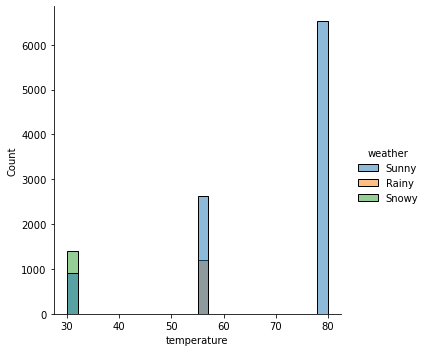

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('data/coupons.csv')
sns.displot(data, x="temperature",hue="weather")

#the below histogram is a breakdown of the temperature per the weather,hue is a SQL equivalent of a group by clause.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('data/coupons.csv')
data_coupon = data['coupon']
data_coupon.value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

2. What proportion of bar coupons were accepted?


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('data/coupons.csv')
data_coupon = data['coupon']
data_coupon2 = data_coupon.value_counts()
data.query('Y == 1',inplace=True)
data_coupon1 = data['coupon'].value_counts()
data_coupon1
data_coupon2
div_count = data_coupon1 / data_coupon2
div_count
#this is a breakdown of the acceptance of the all the coupons the bar coupons were about 41%

Coffee House             0.499249
Restaurant(<20)          0.707107
Carry out & Take away    0.735478
Bar                      0.410015
Restaurant(20-50)        0.441019
Name: coupon, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('data/coupons.csv')
filtered_values = np.where( (data['coupon'] =='Bar') & (data['Y'] == 1) )

#dataframe.loc[dataframe['Percentage'] > 70] 
data1 = data.loc[filtered_values]
data1['passanger'].value_counts()
#Alone        489, 
#Friend(s)188,Partner      107,Kid(s)        43


filtered_values2 = np.where( (data['coupon'] =='Bar') & (data['Y'] == 1) & ((data['RestaurantLessThan20'] == '1~3')| (data['Restaurant20To50'] == '1~3')))

data2 = data.loc[filtered_values2]
data2['passanger'].value_counts()
#value count for 3/fewer
#Alone        288
#Friend(s)    109
#Partner       69
#Kid(s)        24


filtered_values3 = np.where( (data['coupon'] =='Bar') & (data['Y'] == 1) & ((data['RestaurantLessThan20'] == '4~8')| (data['Restaurant20To50'] == '4~8')))

data3 = data.loc[filtered_values3]
data3['passanger'].value_counts()
#value count for more than 3
#Alone        166
#Friend(s)     62
#Partner       36
#Kid(s)        19



Alone        166
Friend(s)     62
Partner       36
Kid(s)        19
Name: passanger, dtype: int64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('data/coupons.csv')
filtered_values = np.where( (data['coupon'] =='Bar') & (data['Y'] == 1) & (data['age'] > '25') & ((data['RestaurantLessThan20'] == '1~3')| (data['Restaurant20To50'] == '1~3')) )
data1 = data.loc[filtered_values]
data1['gender'].value_counts()
#acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 
#Male      211
#Female    156
#acceptance rate for drivers who go to a bar more than once a month and are below or equal the age of 25 
filtered_values1 = np.where( (data['coupon'] =='Bar') & (data['Y'] == 1) & (data['age'] <='25') & ((data['RestaurantLessThan20'] == '1~3')| (data['Restaurant20To50'] == '1~3')))
data2 = data.loc[filtered_values1]
data2['gender'].value_counts()

#Male      73
#Female    50

Male      73
Female    50
Name: gender, dtype: int64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('data/coupons.csv')

filtered_values = np.where( (data['coupon'] =='Bar') & (data['Y'] == 1) & (data['passanger'] != 'Kid(s)') & ((data['RestaurantLessThan20'] == '1~3')| (data['Restaurant20To50'] == '1~3')) & (data['occupation'] != 'Farming Fishing & Forestry'))

data1 = data.loc[filtered_values]
data1['gender'].value_counts()

#acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
#Male      270
#Female    193


Male      270
Female    193
Name: gender, dtype: int64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('data/coupons.csv')

filtered_values = np.where( (data['coupon'] =='Bar') & (data['Y'] == 1) & (data['passanger'] != 'Kid(s)') & ((data['maritalStatus'] != 'Widowed ')))

data1 = data.loc[filtered_values]
data1['gender'].value_counts()
data1.rename(columns={"gender": "Gender1"},inplace=True)


#Accepance rate
#Male      451
#Female    333



filtered_values1 = np.where( (data['coupon'] =='Bar') & (data['Y'] == 1) & (data['age'] < 'below21')  )

Data2 = data.loc[filtered_values1]
Data2['gender'].value_counts()
Data2.rename(columns={"gender": "Gender2"},inplace=True)

#Accepance rate
#Male      452
#Female    339


filtered_values2= np.where( (data['coupon'] =='Bar') & (data['Y'] == 1) & (data['income']  < '$50000 - $62499 '))


Data3 = data.loc[filtered_values2]
Data3['gender'].value_counts()
Data3.rename(columns={"gender": "Gender3"},inplace=True)


#Accepance rate
#Male      351
#Female    251

data4 = pd.merge(pd.merge(data1,Data2,on='age',how="outer"),Data3,on='age',how="outer")



data4.plot(x='Age', y=['Gender1', 'Gender2', 'Gender3'],kind='line')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.title('Trend Comparison')

# Display the plot
plt.show()




7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [10]:
7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons

SyntaxError: invalid syntax (2739116038.py, line 1)

In [ ]:
#Based on the results the people earning less than 50k and visiting bad more than 4 times is less, the other two observations
#are more on even turns based on observed results acceptance rates are almost identical for option 1 and 2 although more females are observed for option2 than option 1

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('data/coupons.csv')

filtered_values = np.where( (data['coupon'] =='Bar') & (data['Y'] == 1) & (data['passanger'] != 'Kid(s)') & ((data['maritalStatus'] != 'Widowed ')))

data1 = data.loc[filtered_values]
data1['gender'].value_counts()
data1.rename(columns={"gender": "Gender1"})
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 13 to 12652
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           784 non-null    object
 1   passanger             784 non-null    object
 2   weather               784 non-null    object
 3   temperature           784 non-null    int64 
 4   time                  784 non-null    object
 5   coupon                784 non-null    object
 6   expiration            784 non-null    object
 7   gender                784 non-null    object
 8   age                   784 non-null    object
 9   maritalStatus         784 non-null    object
 10  has_children          784 non-null    int64 
 11  education             784 non-null    object
 12  occupation            784 non-null    object
 13  income                784 non-null    object
 14  car                   3 non-null      object
 15  Bar                   777 non-null   